<a href="https://colab.research.google.com/github/cielcs/Bayesian-inference/blob/main/MFCC%E3%81%A8%E4%B8%BB%E6%88%90%E5%88%86%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install librosa numpy

In [4]:
import librosa
import numpy as np

sound_path = '/content/drive/MyDrive/naist/Bsound/'

def extract_mfcc(wav_file, n_mfcc=13):
    # Load the WAV file
    y, sr = librosa.load(wav_file, sr=None)

    # Extract MFCC features
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

    # Transpose the MFCCs to have time steps in rows and coefficients in columns
    mfccs = mfccs.T

    return mfccs

# Example usage
wav_file = sound_path + '5_29_1447.wav'  # Replace with your WAV file path
mfcc_features = extract_mfcc(wav_file)

print(mfcc_features)


[[-719.1583     257.4525      25.786686  ...    3.7705483    6.5649834
     4.538049 ]
 [-755.1025     233.59987     37.330383  ...    5.225587     6.5941772
     7.992103 ]
 [-835.35333    176.11072     65.77734   ...   15.4088       8.621831
    10.432243 ]
 ...
 [-840.00903    170.95068     63.71631   ...   17.49996     13.832628
    15.471138 ]
 [-785.828      135.84406     50.345924  ...   16.545452    14.641867
    12.009998 ]
 [-750.109      102.63841     40.042637  ...   10.15155      8.248584
     5.5715637]]


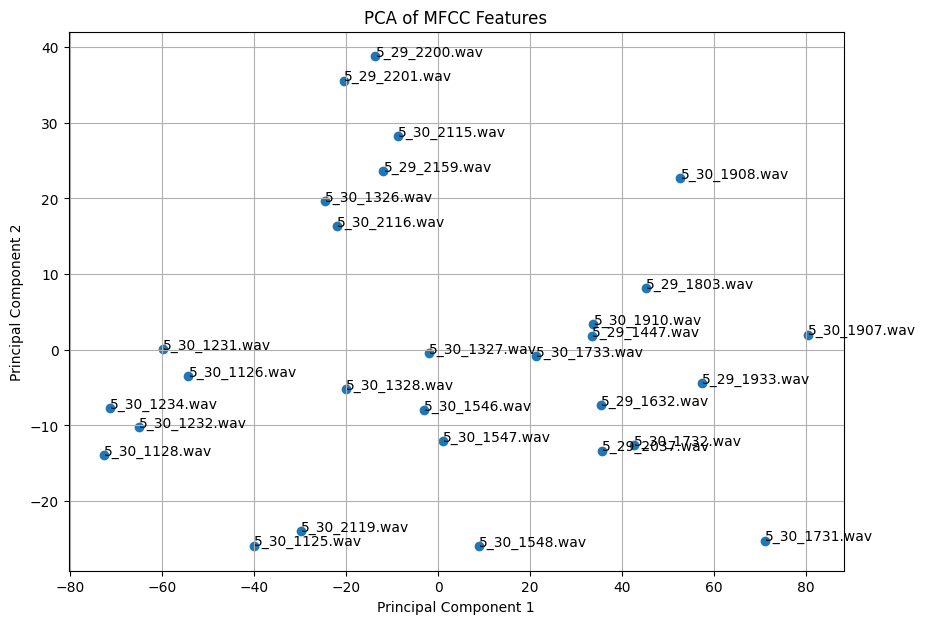

In [12]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# ディレクトリのパス
directory = '/content/drive/MyDrive/naist/Bsound/'

def extract_mfcc(audio_path, n_mfcc=13):
    y, sr = librosa.load(audio_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    mfccs = np.mean(mfccs.T, axis=0)  # 平均を取って特徴量を固定長にする
    return mfccs

def process_directory(directory):
    mfcc_list = []
    labels = []

    for filename in os.listdir(directory):
        if filename.endswith(".wav"):
            file_path = os.path.join(directory, filename)
            mfccs = extract_mfcc(file_path)
            mfcc_list.append(mfccs)
            labels.append(filename)

    return np.array(mfcc_list), labels

# MFCCを抽出
mfcc_features, labels = process_directory(directory)

# PCAを実行
pca = PCA(n_components=2)
mfcc_pca = pca.fit_transform(mfcc_features)

# プロット
plt.figure(figsize=(10, 7))
plt.scatter(mfcc_pca[:, 0], mfcc_pca[:, 1])

for i, label in enumerate(labels):
    plt.annotate(label, (mfcc_pca[i, 0], mfcc_pca[i, 1]))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of MFCC Features')
plt.grid(True)
plt.show()


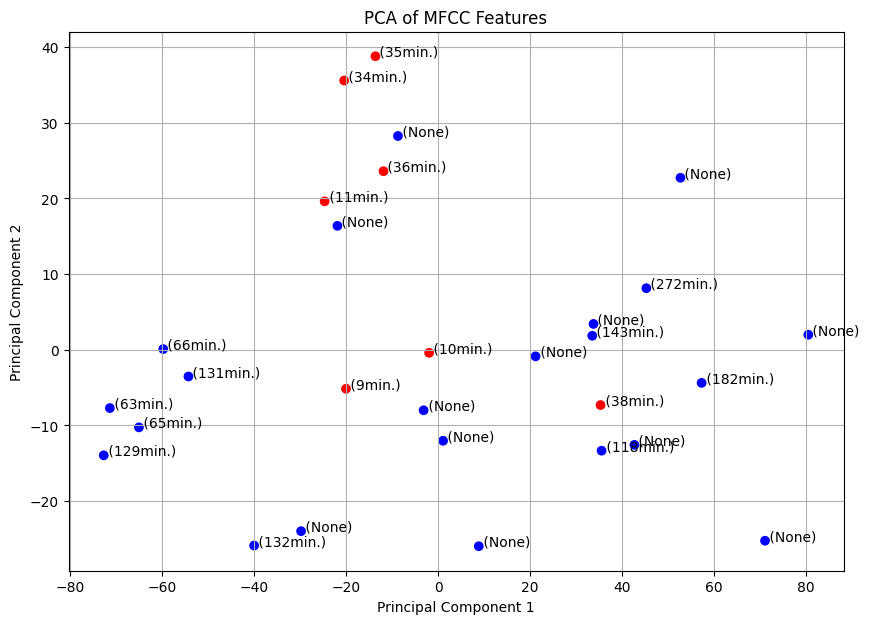

In [15]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from datetime import datetime, timedelta

# ディレクトリのパス
directory = '/content/drive/MyDrive/naist/Bsound/'

# 指定された時刻のリスト（文字列として）
specified_times = ['5_29_1710', '5_29_2235','5_30_1337','5_30_1359']

def parse_time(time_str):
    return datetime.strptime(time_str, '%m_%d_%H%M')

def calculate_minutes_difference(time1, time2):
    delta = time2 - time1
    return int(delta.total_seconds() / 60)

def extract_mfcc(audio_path, n_mfcc=13):
    y, sr = librosa.load(audio_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    mfccs = np.mean(mfccs.T, axis=0)  # 平均を取って特徴量を固定長にする
    return mfccs

def process_directory(directory, specified_times):
    mfcc_list = []
    labels = []
    colors = []
    specified_datetimes = [parse_time(time_str) for time_str in specified_times]

    for filename in os.listdir(directory):
        if filename.endswith(".wav"):
            file_path = os.path.join(directory, filename)
            base_name = os.path.splitext(filename)[0]
            file_time = parse_time(base_name)

            # 指定した時刻の中から音楽ファイルの時刻より後ろで最も近い時刻を見つける
            future_times = [t for t in specified_datetimes if t > file_time]
            if future_times:
                closest_time = min(future_times, key=lambda t: abs(t - file_time))
                minutes_difference = calculate_minutes_difference(file_time, closest_time)
                # ラベルを作成
                # label = f"{filename} ({minutes_difference}min.)"
                label = f" ({minutes_difference}min.)"
                # 色を決定（60分以内なら赤、それ以外は青）
                color = 'red' if minutes_difference <= 60 else 'blue'
            else:
                label = f" (None)"
                color = 'blue'  # 後ろの時刻がない場合も青

            mfccs = extract_mfcc(file_path)
            mfcc_list.append(mfccs)
            labels.append(label)
            colors.append(color)

    return np.array(mfcc_list), labels, colors

# MFCCを抽出
mfcc_features, labels, colors = process_directory(directory, specified_times)

# PCAを実行
pca = PCA(n_components=2)
mfcc_pca = pca.fit_transform(mfcc_features)

# プロット
plt.figure(figsize=(10, 7))
plt.scatter(mfcc_pca[:, 0], mfcc_pca[:, 1], c=colors)

for i, label in enumerate(labels):
    plt.annotate(label, (mfcc_pca[i, 0], mfcc_pca[i, 1]))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of MFCC Features')
plt.grid(True)
plt.show()
